In [ ]:
import IPython
import matplotlib.pyplot as plt


torch.Size([80, 190])
torch.Size([80, 190])
torch.Size([80, 190])


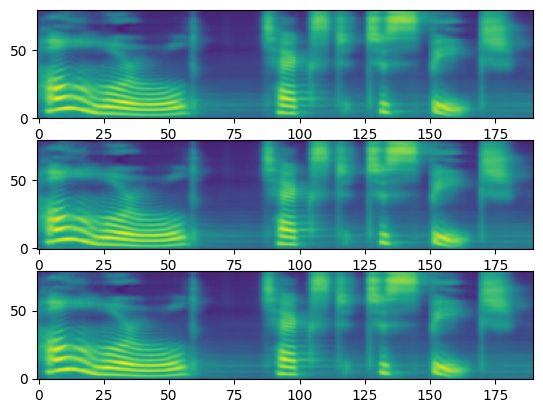

In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

symbols = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"
look_up = {s: i for i, s in enumerate(symbols)}

# Load models and processor once
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

torch.backends.cudnn.benchmark = True  # Enable cudnn benchmark for better performance


def text_to_speech(text):
    with torch.inference_mode():
        processed, lengths = processor(text)
        processed = processed.to(device)
        lengths = lengths.to(device)
        spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
        waveforms, lengths = vocoder.infer(spec, spec_lengths)
    return waveforms[0:1].cpu().detach()


def plot():
    # Run inference once and reuse results
    with torch.inference_mode():
        spec, spec_lengths, _ = tacotron2.infer(processed, lengths)

    fig, ax = plt.subplots(3, 1)
    for i in range(3):
        ax[i].imshow(spec[0].cpu().detach(), aspect="auto", origin="lower")
        print(spec[0].shape)


# Example usage
text = "Hello world! Text to speech!"
processed, lengths = processor(text)
processed = processed.to(device)
lengths = lengths.to(device)

plot()


In [ ]:
import time

from numpy import cast

start_time = time.time()

text = "Hello world! Text to speech, what time is it?"

with torch.inference_mode(), torch.amp.autocast(device_type="cuda"):
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)


end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")


Time taken: 135.76 seconds


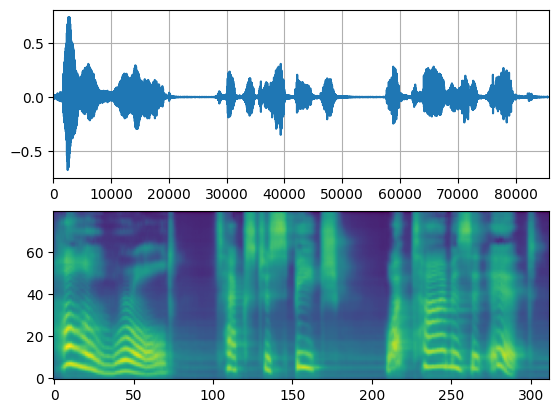

In [ ]:
def plot(waveforms, spec, sample_rate):
    waveforms = waveforms.cpu().detach()

    fig, [ax1, ax2] = plt.subplots(2, 1)
    ax1.plot(waveforms[0])
    ax1.set_xlim(0, waveforms.size(-1))
    ax1.grid(True)
    ax2.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")
    return IPython.display.Audio(waveforms[0:1], rate=sample_rate)


plot(waveforms, spec, vocoder.sample_rate)
